# Summary of things I want to look into further
    Before creating a profile... need to examine the new dataset of active customers to better determine a helpful profile
    Most orders: Day of week = 0 and 1
    Most orders: Hour of day = 10, 11, 14, 13, 15, 12, 16 and 9 (so we have morning, early afternoon and after work orders)
        Figure out a way to create a flag based on when orders happen based on hour
        See if there is a way to merge the 0 and 1 into the hours
        See when most money is spent for the hour of day
    Days since prior order: highest = 7 (so we have weekly shoppers)
        What do they purchase?
    Added to cart: That doesn't seem to have much value
    Reordered: many items reordered
        What's reordered? Either look at it as an item OR department
    Aisle id most orders occur: 24, 83, 123, 120
    Deparment id: 4 & 16
    Highest frequency of price value: 12.3, 10.3, 4, 6.3, 1.3
    Age: not helpful - frequency of one age group over another is not easily seen
    Dependents: equal frequency of all options - not helpful
    Highest frequency of income: 72,334; 112,610; 57,501; 115,620
    Max order highest frequencies: 99 (with a count of 1,157,589), then big drop off to 9 and 8
        Who are these very frequent fliers? What do they order? How much is spent?
    Highest frequency of total spent: 25,792.9; 23,926.5; 9739.2; 13291.9
    Highest frequency of median_days_prior_order: 7 
    
    NOTE: I could not have a frequency visual for all of the above. My computer bogged down and didn't do it. I had memory problems trying to use other libraries I installed: sweetviz, dataprep and pandas profiling
    

# Summary of Active Customer Data
    notes
        day_of_week_ordered ranges from 0-6
        hour_of_day_ordered ranges from 0 -23
        days_since_prior_order ranges from 0 - 30
        add_to_cart_order ranges from 1 to 145 (I had checked this previously and yes, some customers had large orders)
        reordered ranges from 0-1 (this is correct - those are the only options)
        aisle_id ranges from 1 to 134
        department_id ranges from 1-21
        price ranges from 1 to 25
        age ranges from 18 to 81
        dependents ranges from 0 to 3
        income ranges from 25903 to 593901
        max_order ranges from 6 to 99
        total_spent ranges from 6 to 25792.9
        median_days_prior_ord ranges from 0 to 30

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import datetime as dt

In [2]:
#import csv customers dataframe
df_active = pd.read_pickle(r'C:\Users\Selena\Desktop\3-22 Instacart Basket Analysis\04 Analysis\active_all_plus_regions.pkl')
path = r'C:\Users\Selena\Desktop\3-22 Instacart Basket Analysis'
df_active = pd.read_pickle(os.path.join(path, '04 Analysis', 'active_all_plus_regions.pkl'))

<AxesSubplot:>

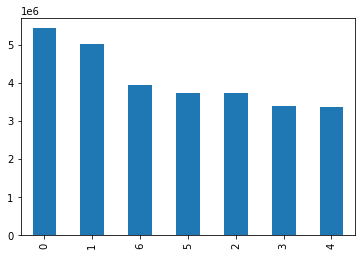

In [3]:
#I assume - bar chart of when orders placed sorted highest to lowest = default
df_active['day_of_week_ordered'].value_counts().plot.bar()

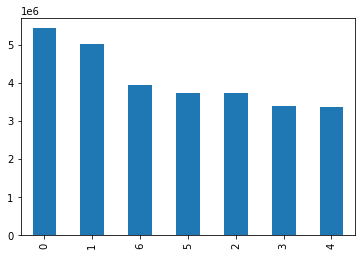

In [4]:
#saving the bar graph as something to export
bar1 = df_active['day_of_week_ordered'].value_counts().plot.bar()

In [5]:
#saving the image within desktop folder - added visualizations
bar1.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_dow.png'))

<AxesSubplot:>

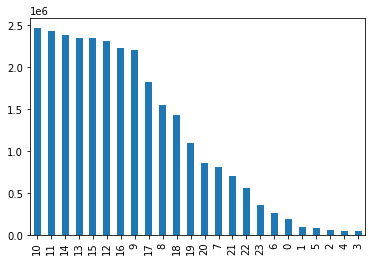

In [6]:
#I assume - bar chart of when orders placed sorted highest to lowest = default
df_active['hour_of_day_ordered'].value_counts().plot.bar()

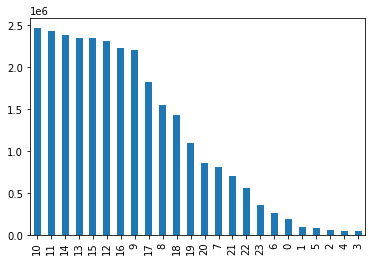

In [7]:
#saving the bar graph as something to export
bar2 = df_active['hour_of_day_ordered'].value_counts().plot.bar()

In [8]:
#saving the image within desktop folder - added visualizations
bar2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_hour_of_day.png'))

<AxesSubplot:>

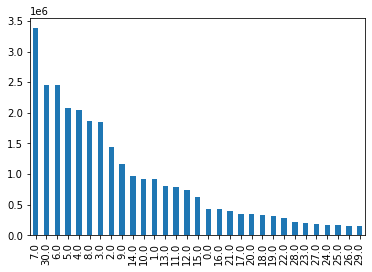

In [9]:
#I assume - bar chart of time between orders sorted highest to lowest = default
df_active['days_since_prior_order'].value_counts().plot.bar()

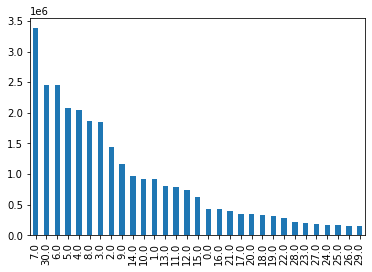

In [10]:
#saving as something to export
bar3 = df_active['days_since_prior_order'].value_counts().plot.bar()

In [11]:
#saving the image within desktop folder - added visualizations
bar3.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_days_since_prior_order.png'))

<AxesSubplot:>

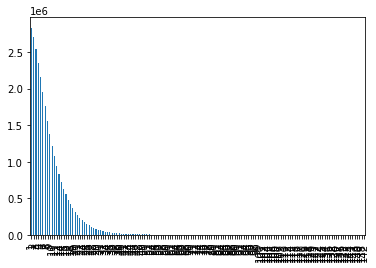

In [12]:
#I assume - bar chart of when orders placed in card sorted highest to lowest = default
df_active['add_to_cart_order'].value_counts().plot.bar()

<AxesSubplot:ylabel='Frequency'>

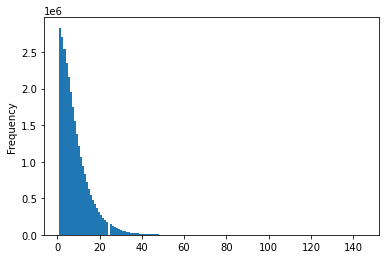

In [13]:
#creating a histogram of add to cart order
df_active['add_to_cart_order'].plot.hist(bins = 150)

<AxesSubplot:>

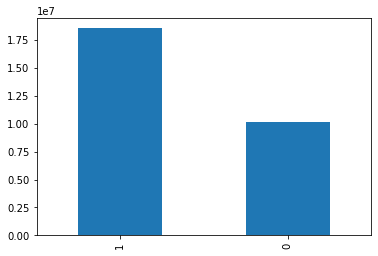

In [14]:
#I assume - bar chart of reordered sorted highest to lowest = default
df_active['reordered'].value_counts().plot.bar()

<AxesSubplot:>

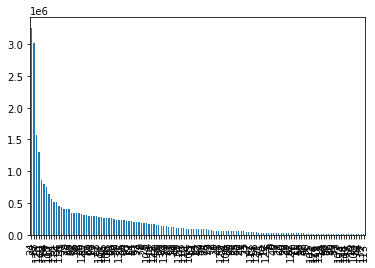

In [15]:
#I assume - bar chart of aisle sorted highest to lowest = default
df_active['aisle_id'].value_counts().plot.bar()

In [16]:
#and the same non-visual way of seeing the data sorted in same way as indexed
df_active['aisle_id'].value_counts(dropna = False)

24     3262723
83     3026268
123    1567401
120    1296382
21      865864
        ...   
102       7709
82        7482
44        7427
132       5324
113       4257
Name: aisle_id, Length: 134, dtype: int64

<AxesSubplot:>

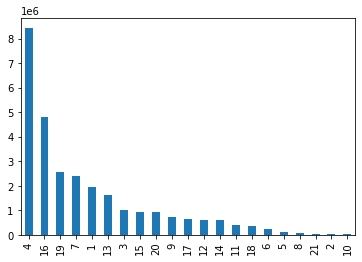

In [17]:
#I assume - bar chart of department sorted highest to lowest = default
df_active['department_id'].value_counts().plot.bar()

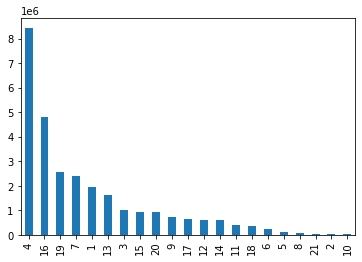

In [18]:
#saving the image within desktop folder - added visualizations
bar4 = df_active['department_id'].value_counts().plot.bar()

In [19]:
#saving the image within desktop folder - added visualizations
bar4.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_department_frequency.png'))

<AxesSubplot:>

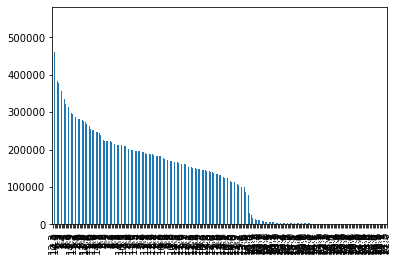

In [20]:
#I assume - bar chart of price sorted highest to lowest = default
df_active['price'].value_counts().plot.bar()

<AxesSubplot:ylabel='Frequency'>

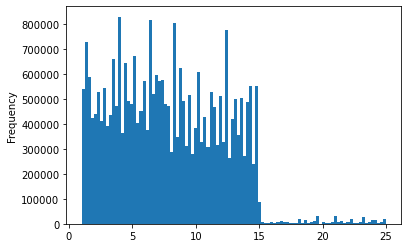

In [21]:
#creating a histogram of prices
df_active['price'].plot.hist(bins = 100)

In [22]:
#and the same non-visual way of seeing the data sorted in same way as indexed
df_active['price'].value_counts(dropna = False)

12.3    553813
10.3    460074
4.0     400763
6.3     384451
1.3     377654
         ...  
20.2       105
22.7        86
21.5        68
18.3         9
21.0         7
Name: price, Length: 240, dtype: int64

<AxesSubplot:>

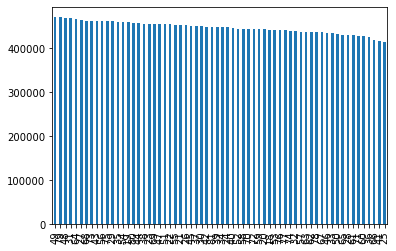

In [23]:
#I assume - bar chart of price sorted highest to lowest = default
df_active['age'].value_counts().plot.bar()

<AxesSubplot:ylabel='Frequency'>

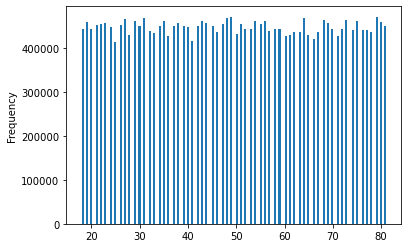

In [24]:
#creating a histogram of age
df_active['age'].plot.hist(bins = 150)

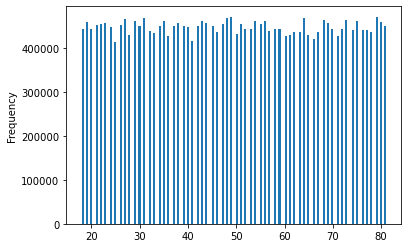

In [25]:
#saving the image within desktop folder - added visualizations
hist1 = df_active['age'].plot.hist(bins = 150)

In [26]:
#saving the image within desktop folder - added visualizations
hist1.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_age_frequency.png'))

<AxesSubplot:>

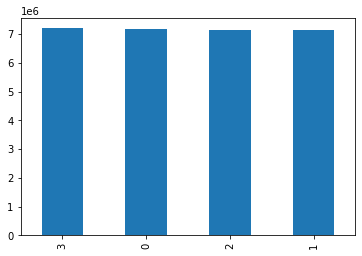

In [27]:
#I assume - bar chart of dependents sorted highest to lowest = default
df_active['dependents'].value_counts().plot.bar()

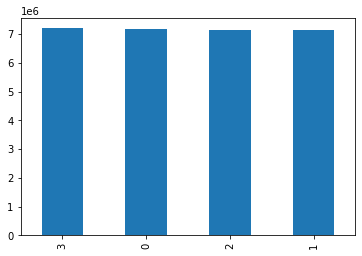

In [28]:
#saving the image within desktop folder - added visualizations
bar5 = df_active['dependents'].value_counts().plot.bar()

In [29]:
#saving the image within desktop folder - added visualizations
bar5.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_dependents_frequency.png'))

In [30]:
#and the same non-visual way of seeing the income data - I was unable to create a bar graph due to long run time
df_active['income'].value_counts(dropna = False)

72344     4298
112610    4137
57501     4085
115620    3774
36163     3579
          ... 
31343        5
102914       5
47305        5
37435        5
147660       1
Name: income, Length: 90753, dtype: int64

<AxesSubplot:>

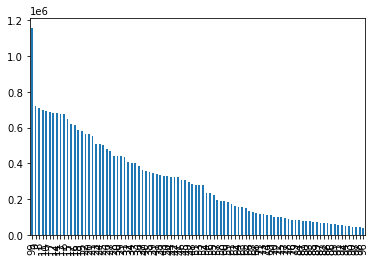

In [31]:
#I assume - bar chart of max order sorted highest to lowest = default
df_active['max_order'].value_counts().plot.bar()

In [32]:
#and the same non-visual way of seeing the max order data - I was unable to create a bar graph due to long run time
df_active['max_order'].value_counts(dropna = False)

99    1157589
9      720077
8      710482
11     699693
10     696043
       ...   
93      49674
90      47750
97      44452
98      44112
96      40045
Name: max_order, Length: 94, dtype: int64

In [33]:
#non-visual way of seeing the total spend data - I was unable to create a bar graph due to long run time
df_active['total_spent'].value_counts(dropna = False)

25792.9    3616
23926.5    3579
9739.2     3551
13291.9    3463
7913.8     3035
           ... 
15.3          5
19.3          5
29.3          5
48.1          5
27.0          5
Name: total_spent, Length: 45121, dtype: int64

In [34]:
#non-visual way of seeing the median days prior order data - I was unable to create a bar graph due to long run time
df_active['median_days_prior_ord'].value_counts(dropna = False)

7.0     5351257
6.0     2818003
8.0     2509701
5.0     2372003
4.0     2224859
         ...   
27.5       3562
26.5       3264
29.5       3086
1.5        1364
0.5          62
Name: median_days_prior_ord, Length: 61, dtype: int64

In [35]:
df_active.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28669841 entries, 0 to 30330083
Data columns (total 30 columns):
 #   Column                  Dtype         
---  ------                  -----         
 0   order_id                int32         
 1   user_id                 int32         
 2   order_number            int16         
 3   day_of_week_ordered     int16         
 4   hour_of_day_ordered     int16         
 5   days_since_prior_order  float64       
 6   product_id              int32         
 7   add_to_cart_order       int16         
 8   reordered               int16         
 9   product_name            category      
 10  aisle_id                int16         
 11  department_id           int16         
 12  price                   float64       
 13  gender                  category      
 14  state                   category      
 15  age                     int16         
 16  date_joined             datetime64[ns]
 17  dependents              int16         
 18  